In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [126]:
df=pd.read_csv('titanic_train.csv')

In [127]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [129]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [130]:
df.groupby(['Sex','Survived']).count()

PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Sex    Survived                                                               
female 0                  81      81    81   64     81     81      81    81   
       1                 233     233   233  197    233    233     233   233   
male   0                 468     468   468  360    468    468     468   468   
       1                 109     109   109   93    109    109     109   109   

                 Cabin  Embarked  
Sex    Survived                   
female 0             6        81  
       1            91       231  
male   0            62       468  
       1            45       109

In [131]:
df.groupby(['Pclass','Sex','Survived']).count()

PassengerId  Name  Age  SibSp  Parch  Ticket  Fare  \
Pclass Sex    Survived                                                       
1      female 0                   3     3    3      3      3       3     3   
              1                  91    91   82     91     91      91    91   
       male   0                  77    77   61     77     77      77    77   
              1                  45    45   40     45     45      45    45   
2      female 0                   6     6    6      6      6       6     6   
              1                  70    70   68     70     70      70    70   
       male   0                  91    91   84     91     91      91    91   
              1                  17    17   15     17     17      17    17   
3      female 0                  72    72   55     72     72      72    72   
              1                  72    72   47     72     72      72    72   
       male   0                 300   300  215    300    300     300   300   
              1                  47    47   38     47     47      47    47   

                        Cabin  Embarked  
Pclass Sex    Survived                   
1      female 0             3         3  
              1            78        89  
       male   0            56        77  
              1            39        45  
2      female 0             1         6  
              1             9        70  
       male   0             2        91  
              1             4        17  
3      female 0             2        72  
              1             4        72  
       male   0             4       300  
              1             2        47

In [132]:
df2=df

In [133]:
df2['rank']=df.groupby('Sex')['Age'].transform(lambda x: x.rank())

In [134]:
df2[(df2['Sex']=='male')&(df2['rank']==2)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,rank
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5,NaN,S,2.0


In [135]:
df.sort_values(['Age','Sex'],ascending=False).groupby('Sex').head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,rank
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,453.0
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,452.0
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,450.5
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,450.5
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,449.0
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,260.5
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S,260.5
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN,259.0
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,D37,C,258.0
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,256.0


In [136]:
df.sort_values('Age',ascending=False).groupby('Sex').cumcount()

630      0
851      1
493      2
96       3
116      4
      ... 
859    574
863    312
868    575
878    576
888    313
Length: 891, dtype: int64

In [137]:
df.sort_values(['Age','Sex'],ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,rank
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,453.0
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,452.0
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,450.5
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,450.5
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,449.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,728,1,3,"Mannion, Miss. Margareth",female,NaN,0,0,36866,7.7375,NaN,Q,NaN
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C,NaN
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN


In [138]:
df2=df[df.groupby('Sex').cumcount()==1]
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,rank
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S,125.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S,304.5


In [139]:
df.groupby('Pclass').mean('Age')

,PassengerId,Survived,Age,SibSp,Parch,Fare,rank
Pclass,,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687,248.263441
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183,192.395954
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550,162.142254


In [140]:
df4=pd.DataFrame(df['Ticket'].str[:3].unique(),columns=['T'])
df4['Count']=df4.index
df4['T_Value']=pd.Series()



<ipython-input-140-0f9476cdb028>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df4['T_Value']=pd.Series()


In [141]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
is_numeric_dtype(df4['T'])
is_numeric_dtype(df4['Count'])
df4['T'].map(type) 
df4.sort_values('T',ascending=False,inplace=True)
x=df4.iloc[:33,0]
df6=pd.DataFrame(x)
df6['Value']=df6.index
df6.set_index('T',inplace=True)
dict2=df6.to_dict()
dict3=(dict2['Value'])
dict3



{'WE/': 127,
 'W/C': 85,
 'W.E': 50,
 'W./': 47,
 'SW/': 88,
 'STO': 2,
 'SOT': 48,
 'SO/': 46,
 'SCO': 91,
 'SC/': 27,
 'SC ': 112,
 'S.W': 131,
 'S.P': 38,
 'S.O': 40,
 'S.C': 28,
 'PP ': 10,
 'PC ': 1,
 'P/P': 100,
 'LIN': 75,
 'Fa ': 68,
 'F.C': 82,
 'CA.': 70,
 'CA ': 36,
 'C.A': 21,
 'C 7': 109,
 'C 4': 124,
 'C 1': 61,
 'A4.': 59,
 'A/S': 121,
 'A/5': 0,
 'A/4': 33,
 'A.5': 67,
 'A./': 23}

In [142]:
df['Ticket_3']=df['Ticket'].str[:3]
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,rank,Ticket_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,128.0,A/5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,199.0,PC
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,125.0,STO
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,184.5,113
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,304.5,373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,198.5,211
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,72.0,112
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,W./
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,186.0,111


In [143]:
def ticket(x):
    if(x in dict3.keys()):
        return dict3[x]
    else:
        return 100

In [144]:
df['T_Value']=df['Ticket_3'].apply(ticket)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,rank,Ticket_3,T_Value
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,128.0,A/5,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,199.0,PC,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,125.0,STO,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,184.5,113,100
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,304.5,373,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,198.5,211,100
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,72.0,112,100
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,W./,47
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,186.0,111,100


In [145]:
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [146]:
df['Title_2'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=True)

In [147]:
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

In [148]:
df.groupby('Title').count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,rank,Ticket_3,T_Value,Title_2
Title,,,,,,,,,,,,,,,,
Master,40,40,40,40,40,36,40,40,40,40,7,40,36,40,40,40
Miss,182,182,182,182,182,146,182,182,182,182,47,181,146,182,182,182
Mlle,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Mme,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Mr,517,517,517,517,517,398,517,517,517,517,93,517,398,517,517,517
Mrs,125,125,125,125,125,108,125,125,125,125,44,124,108,125,125,125
Ms,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1
Rare,23,23,23,23,23,22,23,23,23,23,10,23,22,23,23,23


In [149]:
df['Title']=df['Title'].replace('Mlle','Miss')
df['Title']=df['Title'].replace('Mme','Mrs')
df['Title']=df['Title'].replace('Ms','Miss')

In [150]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [151]:
title_map= {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

In [152]:
df['Title']=df['Title'].map(title_map)

In [153]:
df.drop('Title_2',axis=1,inplace=True)

In [154]:
df.drop('rank',axis=1,inplace=True)

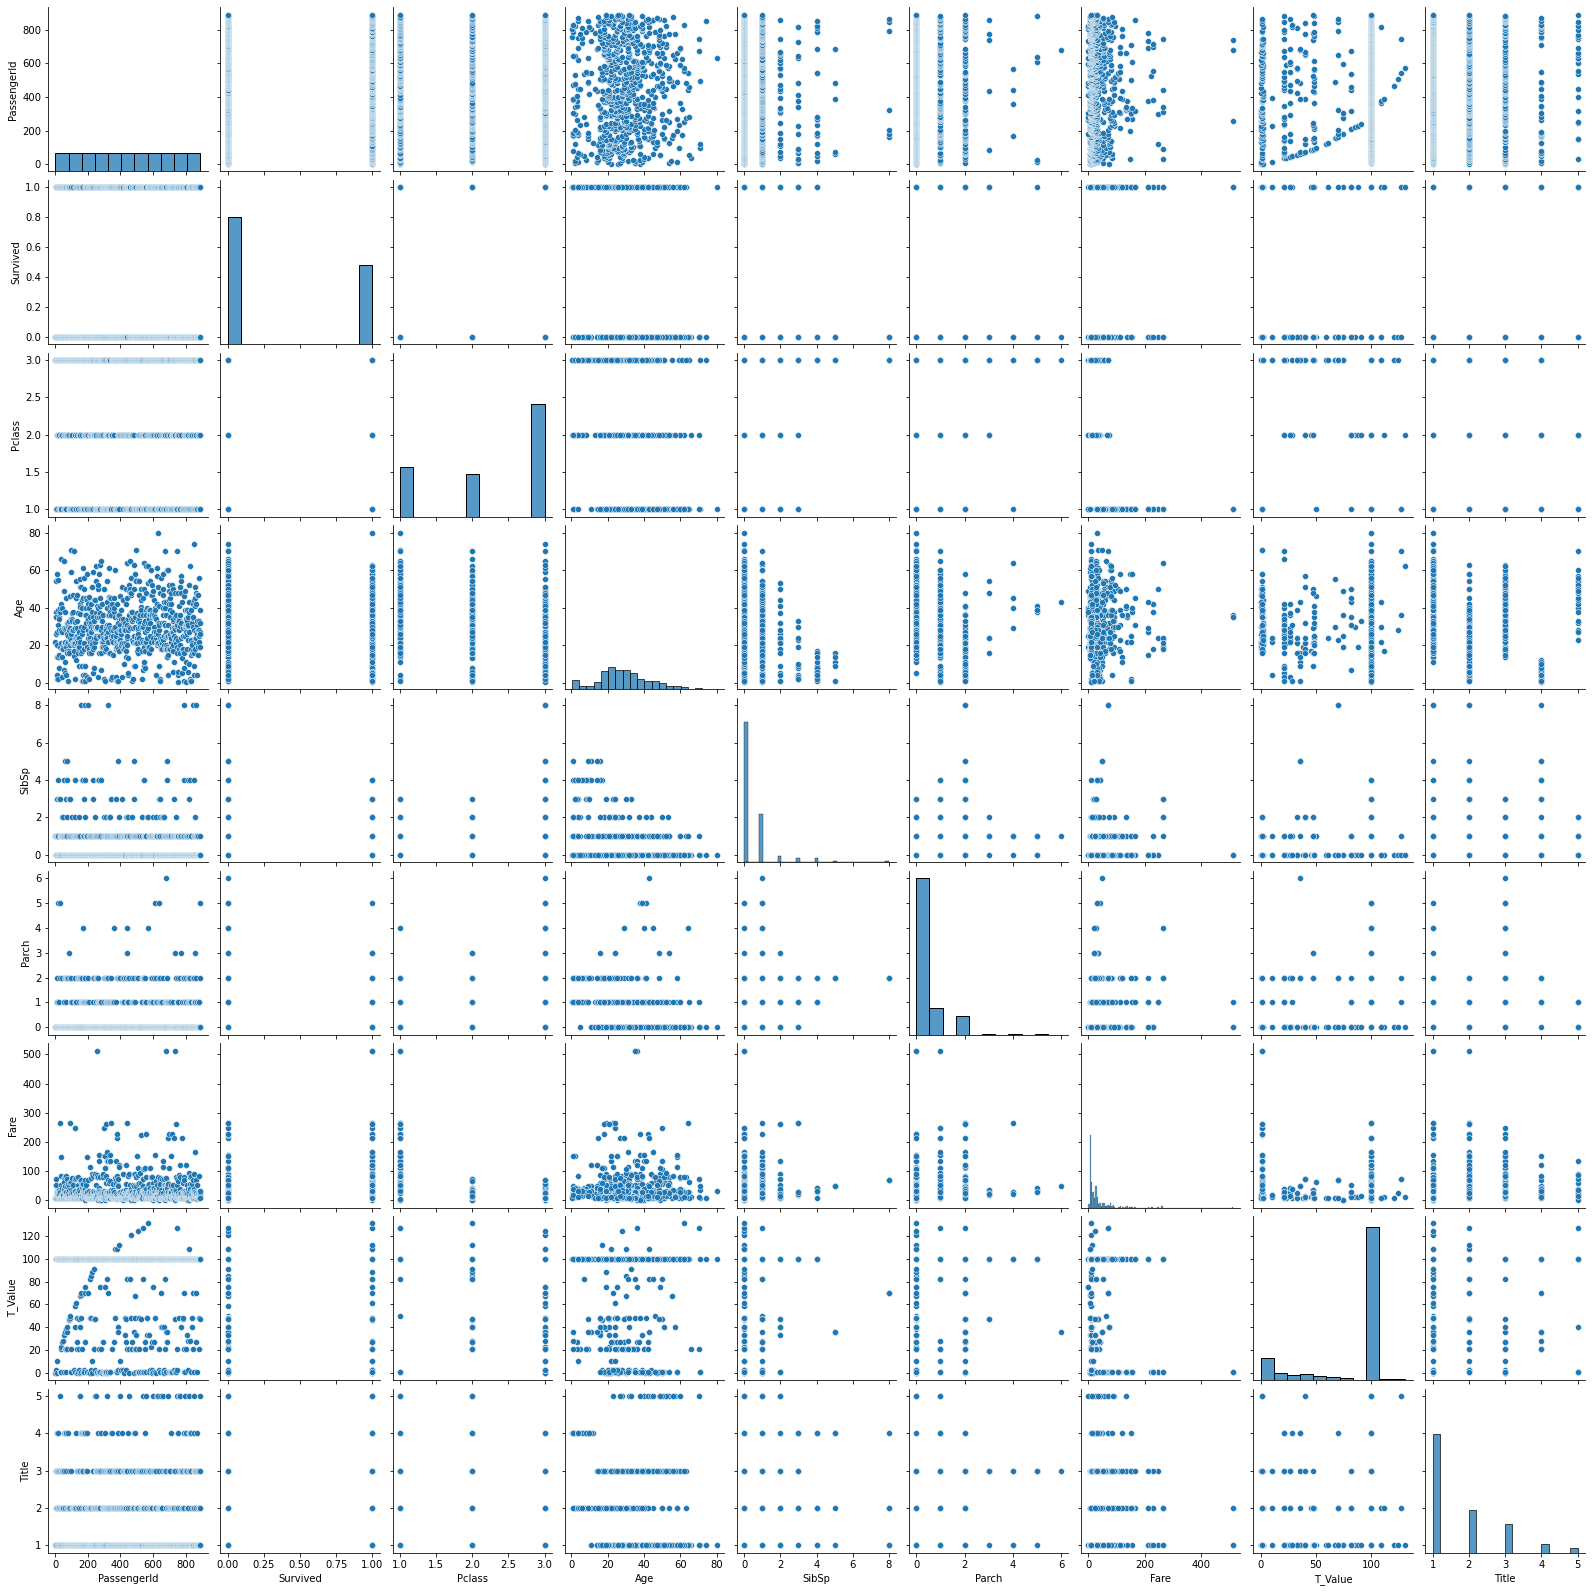

In [155]:
sns.pairplot(df)

In [156]:
df.groupby('Survived').count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_3,T_Value,Title
Survived,,,,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549,549,549,549
1,342,342,342,342,290,342,342,342,342,136,340,342,342,342


<AxesSubplot:xlabel='Survived', ylabel='count'>

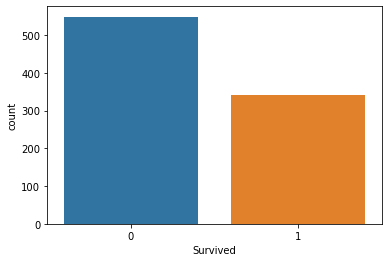

In [157]:
sns.countplot(x='Survived',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

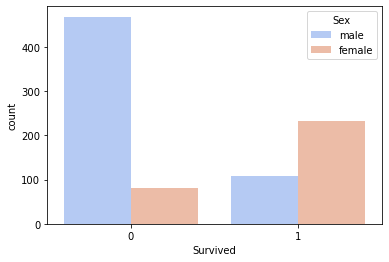

In [158]:
sns.countplot(x='Survived',hue='Sex',data=df,palette='coolwarm')

<AxesSubplot:xlabel='Survived', ylabel='count'>

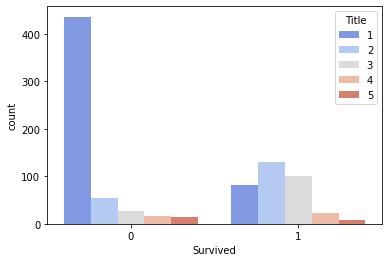

In [159]:
sns.countplot(x='Survived',hue='Title',data=df,palette='coolwarm')

In [160]:
df.groupby('Pclass').mean('Age')

,PassengerId,Survived,Age,SibSp,Parch,Fare,T_Value,Title
Pclass,,,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687,72.435185,1.939815
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183,81.940217,1.956522
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550,85.334012,1.549898


<AxesSubplot:xlabel='Survived', ylabel='count'>

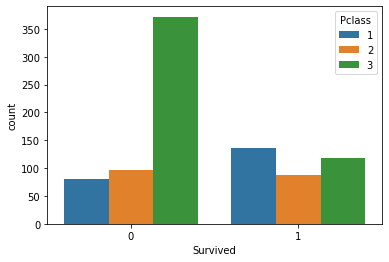

In [161]:
sns.countplot(x='Survived',data=df,hue='Pclass')

Text(0.5, 1.0, 'Average_Age of Passengers as per class')

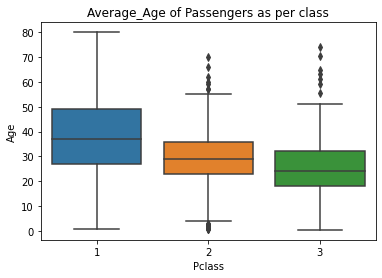

In [162]:
box=sns.boxplot(x='Pclass',y='Age',data=df)
box.set_title('Average_Age of Passengers as per class')

In [163]:
def impute_age(x):
    Age=x[0]
    Pclass=x[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        if Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age
            
  #Way of pasing multiple colums to apply function      

In [164]:
df['Age']=df[['Age','Pclass']].apply(impute_age,axis=1)

In [166]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_3,T_Value,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,A/5,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,PC,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,STO,2,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,113,100,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,373,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,211,100,5
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,112,100,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,S,W./,47,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,111,100,1


In [167]:
cr=df.corr()
cr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,T_Value,Title
PassengerId,1.000000,-0.005007,-0.035144,0.035840,-0.057527,-0.001652,0.012658,0.081967,0.003878
Survived,-0.005007,1.000000,-0.338481,-0.047255,-0.035322,0.081629,0.257307,-0.035881,0.407753
Pclass,-0.035144,-0.338481,1.000000,-0.408487,0.083081,0.018443,-0.549500,0.146522,-0.173929
Age,0.035840,-0.047255,-0.408487,1.000000,-0.243526,-0.171095,0.123784,-0.048991,-0.078909
SibSp,-0.057527,-0.035322,0.083081,-0.243526,1.000000,0.414838,0.159651,-0.005582,0.269623
Parch,-0.001652,0.081629,0.018443,-0.171095,0.414838,1.000000,0.216225,0.000827,0.315784
Fare,0.012658,0.257307,-0.549500,0.123784,0.159651,0.216225,1.000000,-0.245438,0.136310
T_Value,0.081967,-0.035881,0.146522,-0.048991,-0.005582,0.000827,-0.245438,1.000000,0.022198
Title,0.003878,0.407753,-0.173929,-0.078909,0.269623,0.315784,0.136310,0.022198,1.000000


<AxesSubplot:>

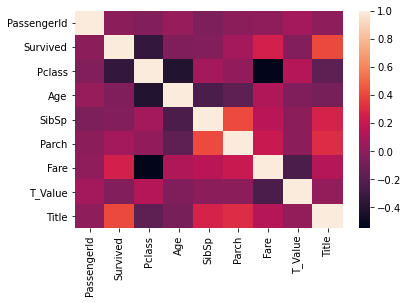

In [168]:
sns.heatmap(cr)

In [169]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)


In [170]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_3,T_Value,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,A/5,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,PC,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,STO,2,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,113,100,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,373,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,211,100,5
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,112,100,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,S,W./,47,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,111,100,1


In [171]:
df.drop(['Sex','Embarked','Name','Ticket','Ticket_3'],axis=1,inplace=True)

In [172]:
df.drop('Cabin',axis=1,inplace=True)

In [173]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,T_Value,Title
0,1,0,3,22.0,1,0,7.2500,0,1
1,2,1,1,38.0,1,0,71.2833,1,3
2,3,1,3,26.0,0,0,7.9250,2,2
3,4,1,1,35.0,1,0,53.1000,100,3
4,5,0,3,35.0,0,0,8.0500,100,1
...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,100,5
887,888,1,1,19.0,0,0,30.0000,100,2
888,889,0,3,24.0,1,2,23.4500,47,2
889,890,1,1,26.0,0,0,30.0000,100,1


In [174]:
df = pd.concat([df,sex,embark],axis=1)

In [175]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,T_Value,Title,male,Q,S
0,1,0,3,22.0,1,0,7.2500,0,1,1,0,1
1,2,1,1,38.0,1,0,71.2833,1,3,0,0,0
2,3,1,3,26.0,0,0,7.9250,2,2,0,0,1
3,4,1,1,35.0,1,0,53.1000,100,3,0,0,1
4,5,0,3,35.0,0,0,8.0500,100,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,100,5,1,0,1
887,888,1,1,19.0,0,0,30.0000,100,2,0,0,1
888,889,0,3,24.0,1,2,23.4500,47,2,0,0,1
889,890,1,1,26.0,0,0,30.0000,100,1,1,0,0


In [176]:
from sklearn.model_selection import train_test_split

In [177]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1), 
                                                    df['Survived'], test_size=0.30, 
                                                    random_state=101)

In [178]:
from sklearn.linear_model import LogisticRegression

In [179]:
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [180]:
predictions = logmodel.predict(X_test)

In [181]:
coeff_df = pd.DataFrame(X_train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logmodel.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
7,male,0.451309
9,S,0.115892
5,T_Value,0.004898
0,Pclass,0.000196
6,Title,-0.004517
2,SibSp,-0.039276
4,Fare,-0.178086
3,Parch,-0.361881
1,Age,-0.974289
8,Q,-2.255591


In [182]:
from sklearn.metrics import classification_report

In [183]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.86      0.83       154
           1       0.79      0.69      0.74       114

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



In [184]:
import pickle

In [185]:
filename='Titanic_logistic.sav'
pickle.dump(logmodel,open(filename,'wb'))

In [186]:
dft=pd.read_csv('titanic_test.csv')

In [187]:
dft['Age']=dft[['Age','Pclass']].apply(impute_age,axis=1)

In [188]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [189]:
dft['Ticket_3']=dft['Ticket'].str[:3]

In [190]:
dft['T_Value']=dft['Ticket_3'].apply(ticket)

In [191]:
dft.drop('Cabin',axis=1,inplace=True)

In [192]:
dft['Title'] = dft.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [193]:
dft['Title'] = dft['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

In [194]:
df['Title']=df['Title'].replace('Mlle','Miss')
df['Title']=df['Title'].replace('Mme','Mrs')
df['Title']=df['Title'].replace('Ms','Miss')

In [195]:
dft['Title']=dft['Title'].map(title_map)

In [196]:
dft

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Ticket_3,T_Value,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,330,100,1.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,363,100,3.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,240,100,1.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,315,100,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,310,100,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,S,A.5,67,1.0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,PC,1,5.0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,SOT,48,1.0
416,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,S,359,100,1.0


In [197]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
 10  Ticket_3     418 non-null    object 
 11  T_Value      418 non-null    int64  
 12  Title        417 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 42.6+ KB


In [198]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
 10  Ticket_3     418 non-null    object 
 11  T_Value      418 non-null    int64  
 12  Title        417 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 42.6+ KB


In [199]:
sex2 = pd.get_dummies(dft['Sex'],drop_first=True)
embark2 = pd.get_dummies(dft['Embarked'],drop_first=True)


In [200]:
dft.drop(['Sex','Embarked','Name','Ticket','Ticket_3'],axis=1,inplace=True)

In [201]:
dft=pd.concat([dft,sex2,embark2],axis=1)

In [208]:
dft['Title'].fillna(value=1,inplace=True)

In [209]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         418 non-null    float64
 6   T_Value      418 non-null    int64  
 7   Title        418 non-null    float64
 8   male         418 non-null    uint8  
 9   Q            418 non-null    uint8  
 10  S            418 non-null    uint8  
dtypes: float64(3), int64(5), uint8(3)
memory usage: 27.5 KB


In [210]:
lr_titanic_model = pickle.load(open(filename, 'rb'))

In [211]:
Final_Test=lr_titanic_model.predict(dft)


In [212]:
dc=pd.DataFrame(Final_Test,columns=['Result'])

In [213]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Result  418 non-null    int64
dtypes: int64(1)
memory usage: 3.4 KB


In [214]:
result=pd.concat([dft,dc],axis=1)

In [215]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         418 non-null    float64
 6   T_Value      418 non-null    int64  
 7   Title        418 non-null    float64
 8   male         418 non-null    uint8  
 9   Q            418 non-null    uint8  
 10  S            418 non-null    uint8  
 11  Result       418 non-null    int64  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 30.7 KB


In [216]:
result.to_excel('Logisticttresult2.xlsx')